## Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//afarbin/DATA1401-Spring-2020/blob/master/Labs/Lab-4/Lab-4.ipynb)

In this lab we will become familiar with distributions, histograms, and functional programming. 


### Uniform Distribution
Lets start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [4]:
import random
x=random.random()
print( "The Value of x is", x)

The Value of x is 0.05866035491001076


Everytime you call random, you will get a new number.

*Exercise 1:* Using random, write a function `generate_uniform(N, mymin, mymax)`, that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [0]:
# Skeleton
def generate_uniform(N,x_min,x_max):
    out = []
    ### BEGIN SOLUTION
    for i in range (N):
      out.append(random.randrange(x_min, x_max))
    # Fill in your solution here        
    
    ### END SOLUTION
    return out

In [6]:
data = generate_uniform(1000,-10,10)
print(type(data))
print(len(data))
print(type(data[0]))
print(min(data))
print(max(data))

<class 'list'>
1000
<class 'int'>
-10
9


In [0]:
# Test your solution here
data=generate_uniform(1000,-10,10)
print ("Data Type:", type(data))
print ("Data Length:", len(data))
if len(data)>0: 
    print ("Type of Data Contents:", type(data[0]))
    print ("Data Minimum:", min(data))
    print ("Data Maximum:", max(data))

Data Type: <class 'list'>
Data Length: 1000
Type of Data Contents: <class 'int'>
Data Minimum: -10
Data Maximum: 9


*Exercise 2a:* 
Write a function that computes the mean of values in a list.

In [58]:
# Skeleton

Data = [1,2,3,4,5,6,7,8,9,10]

def mean(Data):
    m=0.
    return sum(Data)/len(Data)
Mean = mean(Data)
    ### BEGIN SOLUTION
'''Data = []
    for i in range(Data):
      print(Data)
    # Fill in your solution here        
    
    ### END SOLUTION
    
    return m'''

'Data = []\n    for i in range(Data):\n      print(Data)\n    # Fill in your solution here        \n    \n    ### END SOLUTION\n    \n    return m'

In [59]:
# Test your solution here
print ("Mean of Data:", round(Mean, 2))

Mean of Data: 5.5


*Exercise 2b:* 
Write a function that computes the variance of values in a list.

In [60]:
# Skeleton
import numpy as np
def variance(Data):
    
    
    ### BEGIN SOLUTION
    a = print(np.var(Data))

    # Fill in your solution here        
    
    ### END SOLUTION
    
    return a
    
import numpy as np
print(np.var(Data))

8.25


In [0]:
# Test your solution here
print("Variance of Data:", variance(Data))

8.25
Variance of Data: None


## Histogramming

*Exercise 3:* Write a function that bins the data so that you can create a histogram. An example of how to implement histogramming is the following logic:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+i*2*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    

In [0]:
# Solution
import matplotlib.pyplot as plt
 

def arange(x_min,x_max,steps = 10):
  step_size = (x_max - x_min)/steps
  x=x_min
  out= []
  for i in range(steps):
    out.append(x)
    x+=step_size
  return out


def histogram(x,n_bins=10,x_min=None,x_max=None):
    ### BEGIN SOLUTION
    
    # determining the extrema
    if x_min is None:
      x_min = min(x)
    if x_max is None:
      x_max = max(x)

    #determine bin size
    if n_bins is None:
      n_bins = 10

    bin_edges = arange(x_min,x_max,n_bins)
    bin_edges.append(x_max)


    bin_size = (x_max - x_min)/n_bins
    hist = [0]*n_bins
    bin_edges = []
    z=int(n_bins)

    for d in x:
      for i in range(len(hist)):
        bin_edges.append(x_min+(i*bin_size))
        if (d>=(x_min+i*bin_size)) and (d<=((x_min+i)*2*bin_size)):
          hist[i] +=1
          
      

    
    



    # Fill in your solution here        
    
    ### END SOLUTION

    return hist,bin_edges

In [43]:
# Test your solution here
h,b =histogram(data,n_bins =100)
print(h,b)


[358, 310, 310, 356, 356, 407, 358, 358, 415, 415, 469, 418, 418, 457, 457, 457, 452, 452, 529, 529, 529, 579, 528, 528, 580, 580, 628, 580, 580, 611, 611, 611, 587, 587, 642, 642, 642, 596, 596, 596, 596, 596, 596, 545, 545, 545, 545, 545, 488, 488, 488, 488, 488, 434, 434, 434, 434, 434, 395, 395, 395, 395, 395, 395, 352, 352, 352, 352, 352, 275, 275, 275, 275, 275, 225, 225, 225, 225, 225, 173, 173, 173, 173, 173, 173, 125, 125, 125, 125, 125, 94, 94, 94, 94, 94, 55, 55, 55, 55, 55] [-10.0, -9.81, -9.62, -9.43, -9.24, -9.05, -8.86, -8.67, -8.48, -8.29, -8.1, -7.91, -7.72, -7.529999999999999, -7.34, -7.15, -6.96, -6.77, -6.58, -6.390000000000001, -6.2, -6.01, -5.82, -5.63, -5.4399999999999995, -5.25, -5.06, -4.87, -4.68, -4.49, -4.3, -4.11, -3.92, -3.7299999999999995, -3.54, -3.3499999999999996, -3.16, -2.9699999999999998, -2.7800000000000002, -2.59, -2.4000000000000004, -2.21, -2.0199999999999996, -1.83, -1.6400000000000006, -1.4499999999999993, -1.2599999999999998, -1.0700000000000

(array([55.,  0.,  0.,  0.,  0., 46.,  0.,  0.,  0.,  0., 38.,  0.,  0.,
         0.,  0., 48.,  0.,  0.,  0.,  0.,  0., 46.,  0.,  0.,  0.,  0.,
        60.,  0.,  0.,  0.,  0., 43.,  0.,  0.,  0.,  0., 56.,  0.,  0.,
         0.,  0.,  0., 48.,  0.,  0.,  0.,  0., 48.,  0.,  0.,  0.,  0.,
        42.,  0.,  0.,  0.,  0., 56.,  0.,  0.,  0.,  0.,  0., 54.,  0.,
         0.,  0.,  0., 53.,  0.,  0.,  0.,  0., 52.,  0.,  0.,  0.,  0.,
        52.,  0.,  0.,  0.,  0.,  0., 53.,  0.,  0.,  0.,  0., 55.,  0.,
         0.,  0.,  0., 52.,  0.,  0.,  0.,  0., 43.]),
 array([-10.  ,  -9.81,  -9.62,  -9.43,  -9.24,  -9.05,  -8.86,  -8.67,
         -8.48,  -8.29,  -8.1 ,  -7.91,  -7.72,  -7.53,  -7.34,  -7.15,
         -6.96,  -6.77,  -6.58,  -6.39,  -6.2 ,  -6.01,  -5.82,  -5.63,
         -5.44,  -5.25,  -5.06,  -4.87,  -4.68,  -4.49,  -4.3 ,  -4.11,
         -3.92,  -3.73,  -3.54,  -3.35,  -3.16,  -2.97,  -2.78,  -2.59,
         -2.4 ,  -2.21,  -2.02,  -1.83,  -1.64,  -1.45,  -1.26,  -1.07,
  

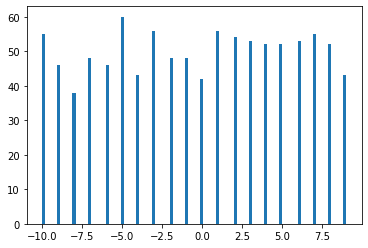

In [0]:
plt.hist(data, bins =100 )

*Exercise 4:* Write a function that uses the histogram function in the previous exercise to create a text-based "graph". For example the output could look like the following:
```
[  0,  1] : ######
[  1,  2] : #####
[  2,  3] : ######
[  3,  4] : ####
[  4,  5] : ####
[  5,  6] : ######
[  6,  7] : #####
[  7,  8] : ######
[  8,  9] : ####
[  9, 10] : #####
```

Where each line corresponds to a bin and the number of `#`'s are proportional to the value of the data in the bin. 

In [0]:
# Solution
def draw_histogram(x,n_bins,x_min=None,x_max=None,character="#",max_character_per_line=20):
    ### BEGIN SOLUTION

    # Fill in your solution here        
    if x_min is None:
      x_min = min(x)
    if x_max is None:
      x_max = max(x)

    #determine bin size
    if n_bins is None:
      n_bins = 10

    bin_edges = arange(x_min,x_max,n_bins)
    bin_edges.append(x_max)


    bin_size = (x_max - x_min)/n_bins
    hist = [0]*n_bins
    bin_edges = []
    z=int(n_bins)

    for d in x:
      for i in range(len(hist)):
        bin_edges.append(x_min+(i*bin_size))
        if (d>=(x_min+i*bin_size)) and (d<=((x_min+i)*2*bin_size)):
          hist[i] +=1
          hist.append(character)
    ### END SOLUTION

    return hist,bin_edges

In [53]:
# Test your solution here
h=histogram(data,20)
print(h)

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 39, 120, 179, 181, 225, 173, 125, 94, 55], [-10.0, -9.05, -8.1, -7.15, -6.2, -5.25, -4.300000000000001, -3.3500000000000005, -2.4000000000000004, -1.450000000000001, -0.5, 0.4499999999999993, 1.3999999999999986, 2.3499999999999996, 3.299999999999999, 4.25, 5.199999999999999, 6.149999999999999, 7.099999999999998, 8.05, -10.0, -9.05, -8.1, -7.15, -6.2, -5.25, -4.300000000000001, -3.3500000000000005, -2.4000000000000004, -1.450000000000001, -0.5, 0.4499999999999993, 1.3999999999999986, 2.3499999999999996, 3.299999999999999, 4.25, 5.199999999999999, 6.149999999999999, 7.099999999999998, 8.05, -10.0, -9.05, -8.1, -7.15, -6.2, -5.25, -4.300000000000001, -3.3500000000000005, -2.4000000000000004, -1.450000000000001, -0.5, 0.4499999999999993, 1.3999999999999986, 2.3499999999999996, 3.299999999999999, 4.25, 5.199999999999999, 6.149999999999999, 7.099999999999998, 8.05, -10.0, -9.05, -8.1, -7.15, -6.2, -5.25, -4.300000000000001, -3.3500000000000005, -2.40000000

## Functional Programming

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5. 

In [0]:
def where(mylist,myfunc):
    out= []
    
    ### BEGIN SOLUTION
    lstcheck = False
    for i in mylist:
      if i > myfunc:
        lstcheck = True
        out.append(i)
        pass
      

      


    # Fill in your solution here        
    
    ### END SOLUTION
    
    return out

In [26]:
# Test your solution here
where(data, 0.5)

[7,
 3,
 5,
 7,
 8,
 3,
 6,
 1,
 2,
 7,
 3,
 3,
 4,
 7,
 9,
 6,
 3,
 1,
 6,
 5,
 6,
 9,
 8,
 2,
 3,
 7,
 7,
 1,
 4,
 3,
 5,
 2,
 5,
 9,
 2,
 3,
 2,
 9,
 2,
 1,
 9,
 3,
 3,
 3,
 6,
 3,
 3,
 5,
 5,
 5,
 3,
 6,
 3,
 5,
 4,
 9,
 5,
 8,
 1,
 4,
 1,
 3,
 3,
 9,
 6,
 2,
 8,
 7,
 8,
 4,
 1,
 5,
 2,
 9,
 2,
 9,
 3,
 2,
 8,
 3,
 2,
 3,
 5,
 6,
 2,
 5,
 3,
 2,
 4,
 9,
 6,
 4,
 9,
 5,
 2,
 9,
 8,
 7,
 9,
 2,
 3,
 8,
 4,
 3,
 3,
 5,
 9,
 6,
 8,
 7,
 3,
 9,
 2,
 6,
 3,
 2,
 9,
 9,
 5,
 9,
 6,
 9,
 6,
 1,
 4,
 5,
 8,
 1,
 3,
 5,
 3,
 2,
 4,
 9,
 9,
 4,
 1,
 8,
 4,
 3,
 9,
 1,
 3,
 4,
 4,
 7,
 5,
 4,
 3,
 5,
 4,
 6,
 7,
 9,
 4,
 3,
 5,
 6,
 8,
 4,
 4,
 5,
 9,
 3,
 5,
 6,
 1,
 2,
 5,
 1,
 8,
 9,
 8,
 3,
 1,
 9,
 9,
 2,
 5,
 3,
 6,
 5,
 5,
 8,
 2,
 9,
 1,
 8,
 4,
 9,
 4,
 1,
 9,
 4,
 1,
 3,
 8,
 2,
 1,
 9,
 9,
 3,
 3,
 4,
 7,
 2,
 3,
 2,
 2,
 5,
 2,
 3,
 6,
 6,
 8,
 5,
 8,
 6,
 2,
 3,
 7,
 3,
 8,
 4,
 6,
 2,
 6,
 3,
 9,
 9,
 3,
 1,
 6,
 2,
 1,
 5,
 2,
 3,
 1,
 9,
 6,
 9,
 4,
 6,
 3,
 3,
 8,
 7,
 3,
 6,


*Exercise 6:* The inrange(mymin,mymax) function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [28]:
def in_range(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=in_range(0,10)
F2=in_range(10,20)

# Test of in_range
print (F1(0), F1(1), F1(10), F1(15), F1(20))
print (F2(0), F2(1), F2(10), F2(15), F2(20))

#print( "Number of Entries passing F1:", len(where(data,F1)))
#print ("Number of Entries passing F2:", len(where(data,F2)))

True True False False False
False False True True False


In [0]:
### BEGIN SOLUTION
def even(x):
  if (x % 2) == 0:
    return True
  else:
    return False

def odd(y):
  if (y % 2) != 0:
    return True
  else:
    return False

def greaterthan(x,y):
  if x > y:
    return True
  else:
    return False
def lessthan(x,y):
  if x < y:
    return True
  else:
    return False
def Equal(x,y):
  if x == y:
    return True
  else:
    return False
def Divisibleby(x,y):
  if (x % y) == 0:
    return True
  else:
    return False
    # Fill in your solution here        
    
### END SOLUTION

In [0]:
# Test your solution
F3 = even(5)
F4 = odd(5)
F5 = greaterthan(5,6)
F6 = lessthan(5,6)
F7 = Equal(5,6)
F8 = Divisibleby(15,5)

print(F3,F4,F5,F6,F7,F8)

False True False True False True


*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above. 

In [0]:
### BEGIN SOLUTION
even = lambda x: True if x%2 ==0 else False
odd = lambda x: True if  x%2 != 0 else False
greaterthan = lambda x,y: True if x>y else False
lessthan = lambda x,y: True if x<y else False
equal = lambda x,y: True if x==y else False
divisibleby = lambda x,y: True if x%y ==0 else False
    # Fill in your solution here        
    
### END SOLUTION
print(even(2),odd(2), greaterthan(7,6), lessthan(7,6))
print (equal(5,5))
print(divisibleby(10,6))

True False True False
True
False


## Monte Carlo

*Exercise 8:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number test_x within the specified range and another number p between the min and max of the function (which you will have to determine). If p<=function(test_x), then place test_x on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, N. For this problem, it's OK to determine the min and max by numerically sampling the function.  

In [0]:
def generate_function(func,x_min,x_max,N=1000):
    out = list()
    ### BEGIN SOLUTION
    if x_min is None:
      x_min = min(func)
    if x_max is None:
      x_max = max(func)
    # Fill in your solution here        
    xd = np.zeros(N)
    a = 1
    b = 1

    for i in range(len(xd)):
      xd[i] = random.uniform(a,b)
    igl = 0 
    for i in range(N):
      igl += func(xd[i])
    
    ans = (b-a)/float(N)*igl
    out.append(ans)
    ### END SOLUTION
    
    return out

In [61]:
# A test function
def test_func(x,a=1,b=1):
    return abs(a*x+b)

generate_function(test_func,1,3,N=1000)


[0.0]

*Exercise 9:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data. 

([0.0],
 (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([-0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
         -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
         -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
          0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
          0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
          0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
          0.5       ]),
  <a list of 30 Patch objects>))

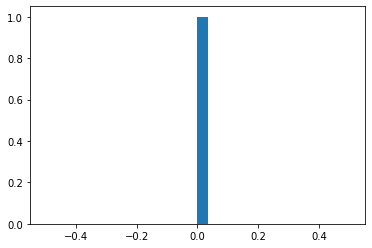

In [0]:
import math

def gaussian(mean, sigma):
    def f(x):
        return math.exp(-((x-mean)**2)/(2*sigma**2))/math.sqrt(math.pi*sigma)
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)

generate_function(g2,-100,100,1000)

*Exercise 10:* Combine your `generate_function`, `where`, and `in_range` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [0]:
def integrate(func, x_min, x_max, n_points=1000):
    for i in range(n_points):
      print(random.normalvariate(0,1))
    w = where(data,.68)
    a = in_range(x_min,x_max)
    

    return integrate

In [71]:
integrate(test_func,None,None,n_points=1000)

-0.988515260924463
-0.23934366819502106
-0.628746393630078
1.3115188876223258
0.347601429938128
-0.5898885360608028
-0.7344121279554098
-1.6232391053819422
1.042432265807377
1.0592161715943373
0.6044813756303663
0.5884598042949716
0.42055658839739984
0.10204009365090617
-1.290508588607049
0.8347265296169466
-1.0619587944851114
0.8981990562005094
-1.3380310153333372
1.5897779143576305
-1.9289696388893318
-0.7018820952269036
-0.7116974960650833
0.8696605379083272
1.4290352976387288
1.0757424827003914
0.26384425194173794
-0.731850536062644
2.4501170223932713
0.18175782121301348
-0.0024275355175183517
1.2110748272782181
-1.9835684733361512
-0.8483330480139895
0.030048186186792638
-0.7486193881441507
0.18053009520132438
-0.41248597759816535
0.2515254740341585
1.0960926139421003
-0.9651751205989552
0.7394047096248987
-0.36301827322937547
1.954251502719237
0.1446048660093722
1.668500600022641
-3.1407139616420667
0.5752308356998838
0.6484786479129058
-0.9751353079665429
1.313372802629408
-0.24

<function __main__.integrate>